# standard_scaling

In [5]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [6]:
# horsepower 열을 Standard Scaling 적용 (판다스)
# 평균: 0, 표준편차: 1
# 중앙값을 중심으로 변환 -> 이상치에 덜 민감함
# 범위가 고정된 데이터에 부적합함(ex. 이미지0~255)

df['horsepower_standard'] = (df['horsepower'] - df['horsepower'].mean()) / \
                             df['horsepower'].std()

df['horsepower_standard'].head()

0    0.663285
1    1.572585
2    1.182885
3    1.182885
4    0.923085
Name: horsepower_standard, dtype: float64

In [7]:
# horsepower 열을 Standard Scaling 적용 (사이킷런)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['horsepower_standard'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_standard'].head()

0    0.664133
1    1.574594
2    1.184397
3    1.184397
4    0.924265
Name: horsepower_standard, dtype: float64

<Axes: >

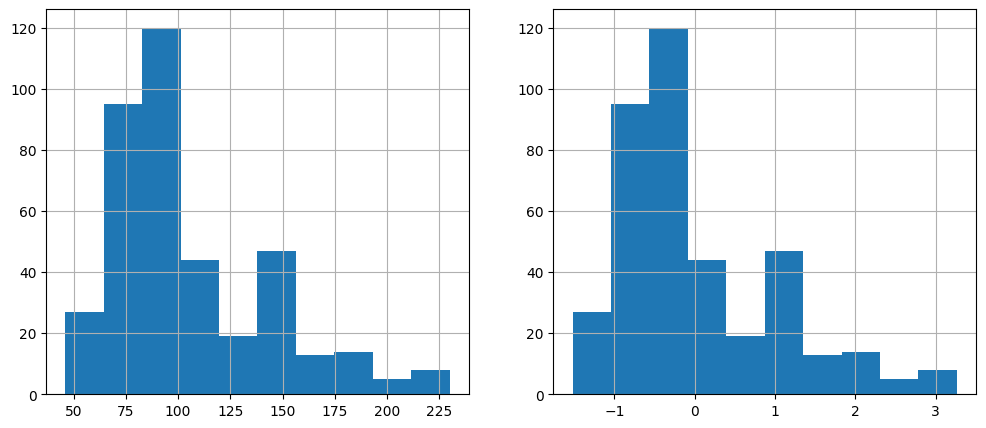

In [10]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2,figsize=(12,5))

df['horsepower'].hist(ax=ax[0])
df['horsepower_standard'].hist(ax=ax[1])